# 분석의 목적
데이터를 통해 잘팔리고 인기있는 제품의 특징을 살펴보고 이를 비즈니스에 적용하기 위한 방안을 모색한다. 또한, 제품에 대한 실시간 데이터 가 들어왔을때 판매량을 예측할 수 있는 모델을 만든다.

## 데이터 확인하기

In [1]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


main_df = pd.read_csv('/content/summer-products-with-rating-and-performance_2020-08.csv')
main_df 

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [2]:
# 데이터 정보 확인
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [3]:
# 결측값 확인
main_df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [4]:
# 데이터 집계 확인
main_df.describe(include='all')

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
count,1573,1573,1573.000000,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573,1532,1559,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,473.0,473,1556,1573,1569,1572,1.573000e+03,1573.000000,1573,1573.000000,226,1573,1573,1573,1573,1573
unique,1201,1203,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1230,101,106,NaN,15,NaN,NaN,NaN,NaN,NaN,2,6,958,957,1058,NaN,NaN,958,NaN,125,1341,1341,1341,1,1
top,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,S,NaN,Livraison standard,NaN,NaN,NaN,NaN,NaN,Quantité limitée !,CN,guangzhouweishiweifushiyouxiangongsi,广州唯适唯服饰有限公司,"83 % avis positifs (32,168 notes)",NaN,NaN,558c2cdc89d53c4005ea2920,NaN,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5e9dad8cbc19c300417e1733,https://contestimg.wish.com/api/webimage/5e9da...,5dea1d9cec016f062ce8aab1,summer,2020-08
freq,24,24,NaN,NaN,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,302,641,NaN,1508,NaN,NaN,NaN,NaN,NaN,472,1516,15,15,14,NaN,NaN,15,NaN,12,3,3,3,1573,1573
mean,NaN,NaN,8.325372,23.288620,NaN,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,NaN,NaN,NaN,33.081373,NaN,2.345200,0.002543,40.456453,49.821360,1.0,NaN,NaN,NaN,NaN,NaN,2.649583e+04,4.032345,NaN,0.143675,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.932030,30.357863,NaN,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,NaN,NaN,NaN,21.353137,NaN,1.024371,0.050379,20.301203,2.562799,0.0,NaN,NaN,NaN,NaN,NaN,7.847446e+04,0.204768,NaN,0.350871,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,6.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.333333,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.810000,7.000000,NaN,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,2.000000,0.000000,31.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,1.987000e+03,3.917353,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.000000,10.000000,NaN,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,2.000000,0.000000,40.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,7.936000e+03,4.040650,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,11.000000,26.000000,NaN,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,3.000000,0.000000,43.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,2.456400e+04,4.161797,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 필요없는 데이터 제거 
df = main_df.copy()
df = df.drop(columns = ['title', 'currency_buyer', 'product_color', 'crawl_month', 'theme', 'product_url', 'product_picture','merchant_profile_picture', 'product_variation_size_id'])
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   rating_five_count             1528 non-null   float64
 8   rating_four_count             1528 non-null   float64
 9   rating_three_count            1528 non-null   float64
 10  rating_two_count              1528 non-null   float64
 11  rating_one_count              1528 non-null   float64
 12  badges_count                  1573 non-null   int64  
 13  bad

In [7]:
df.isnull().sum()

title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
urgency_text                    1100
origin_country                    17
merchant_title                     0
m

데이터 종류 확인

***Nominal*** : uses_ad_boosts(추가 광고 집행여부)/ badge_local_product/ badge_product_quality/ badge_fast_shipping/ shipping_is_express/ has_urgency_banner/ origin_country/ merchant_has_profile_picture/merchant_profile_picture/


***Ordinal*** : badges_count(뱃지 수)/product_variation_size_id/

***Continuous***  : Price(가격)/ retail_price(소매가격)/ rating(등급비율평균)/ merchant_rating/

***Discrete*** : units_sold(판매량)/ rating_count/ shipping_option_price/ (rating_five_count~rating_one_count)/ product_variation_inventory/ countries_shipped_to/ inventory_total/ merchant_rating_count/ 

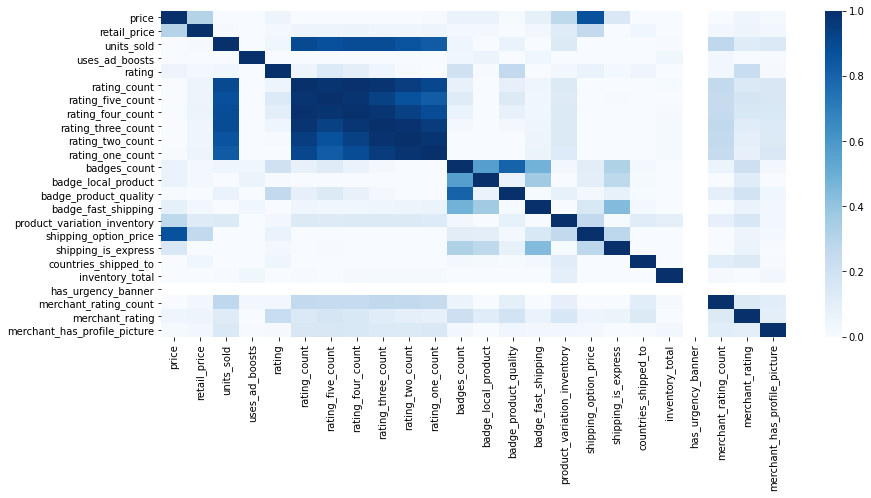

In [8]:
# raw데이터 상관관계 확인해보기
plt.figure(figsize = (14, 6))
sns.heatmap(df.corr(), vmin = 0, vmax =1,cmap = 'Blues')

- 1.판매량과 상품평가등급과 높은 상관관계를 보인다.
- 2.배송비와 가격과 높은 상관관계를 보인다
- 3.판매자 평가수와 판매량과도 상관관계를 보인다
- 4.가격이 높을수록 배송비가 높은 경향을 보이는 것 같다.

## 결측값 처리하기

- 1. 평점 등급 5개 결측값 처리하기

In [9]:
# 결측값 데이터가 모두 같은 데이터에 포함되어있으며 rating_count가 0이라는것을 알아내고 확인해본 결과
df[df['rating_count']==0]

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
74,Fashion Women Sleeveless Lace Vest Loose V Nec...,8.00,33,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Vest,Fashion,Lace,V-neck,Women's Fashion,laceb...",50,Livraison standard,2,0,25,50,NaN,NaN,CN,WSLCWM,wslcwm,"88 % avis positifs (1,496 notes)",1496,4.169786,592955ef980a346d826f7bfc,0,5ed0dfc51fa8446451b19c0d
112,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Shorts,Shirt,Sleeve,sportsset,short sle...",1,Livraison standard,1,0,36,50,NaN,NaN,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5eb90ab5ad67f63678d15ed9
126,Women's Casual Sleeveless Stripe T Shirts Dres...,2.72,9,1,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Plus Size,Shirt,long dress,Dress,Women'...",1,Livraison standard,1,0,33,50,NaN,NaN,CN,Kyiswen,kyiswen,75 % avis positifs (378 notes),378,3.597884,5d417e7070327a2743021677,0,5ed3ae8e7bf8821d5cf4bc64
189,Women's Active Skort Athletic Stretchy Pleated...,5.00,5,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"ladies skort,running skirt,summer skirt,Golf,s...",50,Livraison standard,2,0,8,50,1.0,Quantité limitée !,CN,renpingping,renpingping,80 % avis positifs (129 notes),129,3.837209,5a3231f2e62bbc45b0bda1dd,0,5ed1c059630f990d1d44592c
216,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.00,30,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"woman fashion,Fashion,outside,Vintage,sexy bik...",50,Livraison standard,3,0,78,50,1.0,Quantité limitée !,CN,YIWU SHI AO HANG DIAN ZI SHANG WU YOU XIAN GON...,yiwushiaohangdianzishangwuyouxiangongsi,"91 % avis positifs (22,621 notes)",22621,4.295124,56025ed8293a5b2d24779bde,0,573db9316b335c34ca0513b8
248,Summer Fashion Tie-Dye Short Sleeve Long Dress...,8.00,9,7,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,summer dress,Necks,Sleeve,long dress,pl...",5,Livraison standard,3,0,38,50,NaN,NaN,CN,"SHENZHEN LONGDRAGON TECHNOLOGY CO.,LTD",shenzhenlongdragontechnologycoltd,"87 % avis positifs (108,048 notes)",108048,4.052504,5417aada4ad3ab27e954b76c,1,5e8d70549f1504449514c8b9
309,Ladies Summer Tie Dye Print Short Sleeve Off S...,4.81,5,100,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Plus Size,Tie Dye,tiedyeprint,Dyes,Dres...",5,Envio Padrão,1,0,47,50,1.0,Quantité limitée !,CN,chaoyang_lizhen,chaoyang_lizhen,83% Feedback positivo (6 classificações),6,4.333333,5e5f6272d0e9af054214467e,0,5edda5aeb7160e568443c6e7
346,2020 New Women Summer Fashion O-neck Sleevele...,8.00,7,10,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Slim Fitting,Tank,summer tank top,Tops...",50,Livraison standard,3,0,10,50,NaN,NaN,CN,longming,longming,"85 % avis positifs (27,175 notes)",27175,3.966035,58a99ceca65ebc504a6ebf1e,0,5eccb8aa18e87d64f13e012c
348,Women Summer Fashion Cotton Overalls Sleeveles...,11.00,30,1,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Fashion,Cotton,Casual pants,rompersforw...",10,Livraison standard,2,0,33,50,NaN,NaN,CN,caogao,caogao,"(1,380 notes)",1380,4.007246,5d4b8931933fb13f8a1fe232,0,5ebfdd5bebac37702b0b207b
375,Vintage Kawaii Harajuku T Shirt Women Ullzang ...,8.00,17,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"90sfashion,Summer,Fashion,Princess,cute,Kawaii...",50,Livraison standard,3,0,48,50,1.0,Quantité limitée !,CN,WenqiaoyouuOO,wenqiaoyouuoo,75 % avis positifs (8 notes),8,3.625000,5df1cd2ecce7510b506fdba5,0,5ec48b4f504db2c516aad131


상품의 평가등급은 판매량예측에 있어서 가장 중요한 요소가 되므로 결측값 처리에 신중을 요한다. 하지만, 상인의 평가 수 를 제외하면 유추할 만한 데이터가 없으며, 
이 또한 상관관계가 상대적으로 높을 뿐 1대1로 예측하는데 적합하지 않으므로 45개의 데이터를 삭제 하기로 결정

In [10]:
# mask를 활용하여 등급평가 결측값 제거하기
mask =df['rating_count']==0
df = df[~mask]
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


- 2. 원산지 결측값 처리하기

In [11]:
# 원산지 데이터 살펴보기
print('결측값 수 :',df['origin_country'].isnull().sum())
print('원산지 국가 :',df['origin_country'].unique())
print('비율 :', df['origin_country'].value_counts(normalize = True))

결측값 수 : 17
원산지 국가 : ['CN' 'US' nan 'VE' 'SG' 'GB']
비율 : CN    0.974189
US    0.020516
VE    0.003309
SG    0.001324
GB    0.000662
Name: origin_country, dtype: float64


In [12]:
# 97%를 차지하는 중국으로 결측값 채우기
df['origin_country'] = df['origin_country'].fillna('CN')
print('전처리 후 결측값 확인 :',df['origin_country'].isnull().sum())

전처리 후 결측값 확인 : 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- 3. 판매자 이름 결측값 처리

In [13]:
# 판매자 이름 분포 살펴보기
df['merchant_name'].value_counts().head(30)

广州唯适唯服饰有限公司                              15
greatexpectationstechnology              12
sjhdstoer                                 9
shuilingjiaointernationaltradecompany     8
sangboostore                              8
cenicbeauty                               8
pentiumhorse                              7
zuilangmands                              6
sklioppp                                  6
fengjinying                               6
hellohorse                                6
smarthomeinternationalcoltd               6
sarahouse                                 6
snowgirl                                  6
龙飞凤舞                                      5
xiejiatang                                5
zhuangyuping1                             5
pethasboutique                            5
maxnina                                   5
luoweiclothe                              5
citizenrepublk                            5
witkeybl                                  5
keepahorse                      

판매자 이름 컬럼의 경우 하이커디널리티이며, 특정인물이 독점하지도 않는 모습을 나태내고 있다. 또한 예측을 하기에도 어렵고 결측 데이터가 4개에 불과하기 때문에 해당 데이터를 삭제할 것이다.

In [14]:
# 판매자 이름 결측지 제거
df = df.dropna(subset = ['merchant_name'], how = 'any', axis =0)

- 4. 긴급한 베너가 있는지여부, 검색결과와 일부 제품위에 나타나는 텍스트 베너 결측값 처리

urgency_text
- Quantité limitée : 수량한정
- Réduction sur les achats en gros : 도매 구매 할인

In [15]:
# 결측지가 아닌 모든 상품에 베너가 부착되어있음을 알 수 있다.
df['has_urgency_banner'].value_counts(normalize = True)

1.0    1.0
Name: has_urgency_banner, dtype: float64

In [16]:
# 긴급 베너 텍스트 확인
df['urgency_text']

0       Quantité limitée !
1       Quantité limitée !
2       Quantité limitée !
3                      NaN
4       Quantité limitée !
               ...        
1568                   NaN
1569    Quantité limitée !
1570                   NaN
1571                   NaN
1572                   NaN
Name: urgency_text, Length: 1524, dtype: object

In [17]:
df['urgency_text'].unique()

array(['Quantité limitée !', nan, 'Réduction sur les achats en gros'],
      dtype=object)

In [18]:
df['urgency_text'].value_counts(normalize = True)

Quantité limitée !                  0.997821
Réduction sur les achats en gros    0.002179
Name: urgency_text, dtype: float64

모든 상품에 베너가 붙어있으며 99.7%는 한정슈량 베너이며, 0.03%는 도매 구매 할인 베너이다. 모든상품에 부착되어있으면서 99프로가 같은 베너이므로 베너에 따른 어떠한 인사이트를 얻기 힘들어 보인다. 따라서, 결측값을 제거해 주는 것이 아닌 컬럼 자체를 삭제해 준다.

In [19]:
# 베너 컬럼 두개 삭제
df = df.drop(columns = ['urgency_text', 'has_urgency_banner'], axis = 1)
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


In [20]:
# 결측값 제거후 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 1572
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1524 non-null   object 
 1   price                         1524 non-null   float64
 2   retail_price                  1524 non-null   int64  
 3   units_sold                    1524 non-null   int64  
 4   uses_ad_boosts                1524 non-null   int64  
 5   rating                        1524 non-null   float64
 6   rating_count                  1524 non-null   int64  
 7   rating_five_count             1524 non-null   float64
 8   rating_four_count             1524 non-null   float64
 9   rating_three_count            1524 non-null   float64
 10  rating_two_count              1524 non-null   float64
 11  rating_one_count              1524 non-null   float64
 12  badges_count                  1524 non-null   int64  
 13  bad

## 이상값 처리하기

In [22]:
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


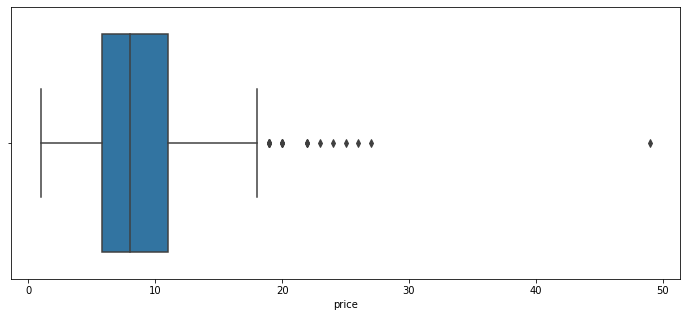

In [25]:
plt.figure(figsize =(12, 5))
sns.boxplot(df['price'])

In [26]:
df['price'].max()

49.0

In [27]:
df[df['price']==49.0]

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
758,Summer Women's Fashion Sleeveless V-neck backl...,49.0,42,100,0,4.67,6,4.0,2.0,0.0,0.0,0.0,1,0,0,1,"party,Goth,Plus Size,Summer,Dress,V-neck,bodyc...",2,Livraison Express,12,1,41,2,CN,Yanfeng Living museum,yanfenglivingmuseum,"90 % avis positifs (29,977 notes)",29977,4.223138,5925555b2cd9447854443c41,0,5d09ecc2f5d4eb7721203368
